In [1]:
""
import numpy as np
import matplotlib as plt
import scipy
from py4cats import *
# ipython qtconsole --pylab=inline &
import os
base_dir = r'C:\Users\chris\Dropbox\SCU\Scripts\py4cats'
# Change the current working directory to the base directory
os.chdir(base_dir)


Py4CAtS --- Python for Computational ATmospheric Spectroscopy

A collection of Python scripts for (molecular) line-by-line absorption
(cross sections, optical depths, ...) and atmospheric radiative transfer

https://doi.org/10.3390/atmos10050262    --->   Atmosphere 10(5), 262, 2019
https://atmos.eoc.dlr.de/tools/Py4CAtS/



 Atmos1d: got p & T (computed air density from p/kT)   and 8 molecules on 50 levels
 WARNING --- atmTruncate:  zToA very small, assuming kilometer units
50 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'N2', 'O2']


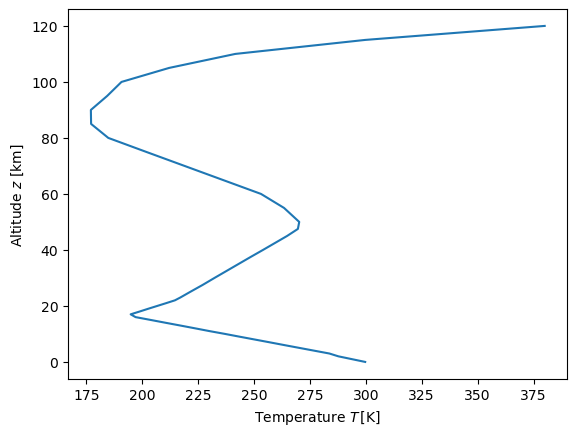

In [2]:
hamo = atmRead(r'data\atmos\50\tropical.xy', zToA=120)  # specify the top of the atmosphere
print(len(hamo), gases(hamo))  # prints the number of levels in the atmospehre and the names of the gasses
atmPlot(hamo) # Plots the atmospheric temp profile

 atmRegrid with default numpy.interp linear interpolation
 WARNING --- atmos1D.atmRegrid:  all altitudes<500, assuming km, converting to cm
 WARNING --- atmos1D.atmRegrid:  new altitude grid exceeding old grid, interpolation might fail to extrapolate
                              0.0 <= zOld <= 12000000.0
                              0.0 <= zGrid <= 12300000.0
 interpolating log(p)
 interpolating log(air)


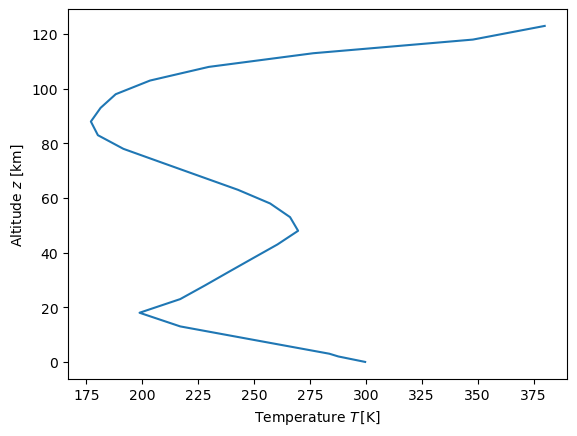

In [3]:
#finegrid = np.arange(0, 50.1, 0.01)
mixedgrid = parseGridSpec('0[0.1] 3[5] 120')
hamo_fine = atmRegrid(hamo, mixedgrid)
#atmPlot(hamo)
atmPlot(hamo_fine)
#atmPlot(hamo_fine, what='H2O') # Plots the atmospheric ozone profile
#atmPlot(hamo_fine, what='O2') # Plots the atmospheric ozone profile

In [4]:


#vcd_O2 = vcd(hamo_fine, 'O2', zMax = 3) #vertical column density of O2 below 3 km
#(hamo_fine[:6],what ='H2O') # plots H2O concentration profile for 6 lowest altitude levels
# atmPlot(hamo[:6],what ='O2') # plots O2 concentration profile for 6 lowest altitude levels
print(vcd_O2)

NameError: name 'vcd_O2' is not defined

 WARNING --- hitran.bisect_first_line:   requested spectral range  11000.000000 --- 15000.000000     only partly in database  12000.029837 --- 13999.980797
# first line in spectral range at record number 1 found in 2062.2963318 sec
 b' 1212000.107509 3.712E-28 1.372E-03.06800.344  482.64340.69-.012540'
# last  line     accepted 
 b' 1113999.980797 6.616E-26 2.232E-04.08390.373  300.36230.69-.017000'
 main gases only:  deleted  9  of  13  molecules in dict of linelists with originally 62456 lines

 36680 lines of  4  molecule(s) extracted from  data/hitran/allmolecules_760nm.par
 returning a dictionary of lineArray's for  H2O CO2 CO O2


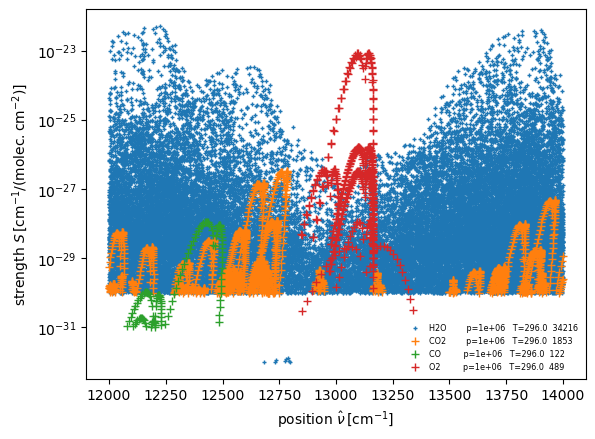

In [5]:

spec = higstract('data/hitran/allmolecules_760nm.par', (11000.,15000.), molecule='main') #extracts a dictionary of line lits from a hitran file
atlas(spec)

 cross section  H2O      34216 lines   1013.25mb  296.0K  25.0      132177     3.67sec     0.81ns:  9.70633e-30 < xs < 1.72176e-22
 cross section  CO2       1853 lines   1013.25mb  296.0K  12.5      132985     0.19sec     0.75ns:         0 < xs < 3.118e-26
 cross section  CO         122 lines   1013.25mb  296.0K  12.5      161785     0.02sec     0.83ns:         0 < xs < 5.7202e-28
 cross section  O2         489 lines   1013.25mb  296.0K  12.5      215865     0.04sec     0.42ns:         0 < xs < 5.34609e-23


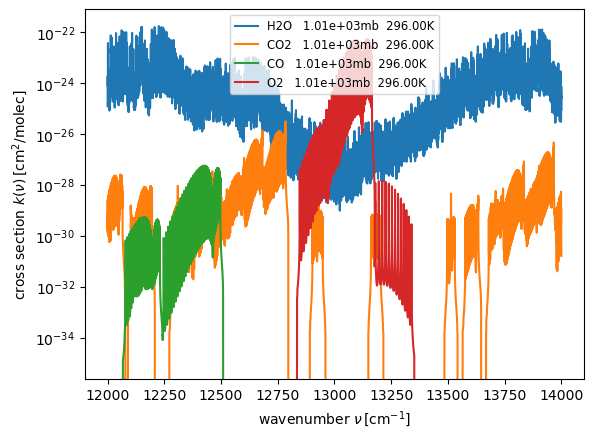

In [6]:
xsection = lbl2xs(spec)
xsPlot(xsection)

In [ ]:
dodList_O2_full = lbl2od(hamo_fine, spec)


 lbl2od:   55 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 36680 lines of ['H2O', 'CO2', 'CO', 'O2']

 lbl2xs:  H2O       18.02amu 34216 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 55 p,T pairs 
 cross section  H2O      34216 lines      1013mb  299.7K  10.0      133033     3.43sec     0.75ns:  9.58407e-30 < xs < 1.71857e-22
 cross section  H2O      34216 lines   1001.53mb  299.1K  10.0      134225     3.32sec     0.72ns:  9.39841e-30 < xs < 1.73143e-22
 cross section  H2O      34216 lines   990.196mb  298.5K  10.0      135425     3.37sec     0.73ns:  9.20992e-30 < xs < 1.75629e-22
 cross section  H2O      34216 lines   978.987mb  297.9K  10.0      136641     3.32sec     0.71ns:  9.02185e-30 < xs < 1.77101e-22
 cross section  H2O      34216 lines   967.906mb  297.3K  10.0      137857     3.40sec     0.72ns:  8.83644e-30 < xs < 1.79732e-22
 cross section  H2O      34216 lines   956.949mb  296.7K  10.0      139081     3.24sec     0.68ns:  8.66693e-30 < xs < 1.

In [ ]:

odPlot(dodList_O2_full)

In [21]:
odSave(dodList_O2_full,"mixedgrid_all.dat")